<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/EDA_downtime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Paradas-2003-L02.xlsx to Paradas-2003-L02.xlsx
User uploaded file "Paradas-2003-L02.xlsx" with length 10286934 bytes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel('https://github.com/Rogerio-mack/work/raw/main/Paradas-2003-L02.xlsx')
df.head()

CENTRO  ID_LINHA_MES  ID_LINHA_SAP                            LINHA  \
0    2003            20         31002  L02 - Envase de Garrafas 40.000   
1    2003            20         31002  L02 - Envase de Garrafas 40.000   
2    2003            20         31002  L02 - Envase de Garrafas 40.000   
3    2003            20         31002  L02 - Envase de Garrafas 40.000   
4    2003            20         31002  L02 - Envase de Garrafas 40.000   

  EMBALAGEM  NOMINAL     UNIDADE             IP  MODELO_FALHA  \
0     VIDRO    40000  PTR         172.20.60.136             3   
1     VIDRO    40000  PTR         172.20.60.136             3   
2     VIDRO    40000  PTR         172.20.60.136             3   
3     VIDRO    40000  PTR         172.20.60.136             3   
4     VIDRO    40000  PTR         172.20.60.136             3   

   ID_LINHA_MES_FIS  ...                   CREATED_AT  CREATED_BY  \
0                 5  ...  2020-03-16 02:00:00.6563334  Calculator   
1                 5  ...  2020-03-16 03:00:00.8620215  Calculator   
2                 5  ...  2020-03-16 10:00:00.4429987  Calculator   
3                 5  ...  2020-03-16 18:00:00.4771744  Calculator   
4                 5  ...  2020-03-17 02:00:00.3734518  Calculator   

                    CHANGED_AT CHANGED_BY DOWNTIME_LABEL_ID     OID  \
0  2020-03-18 12:31:59.9420468     200643               NaN  2569.0   
1  2020-03-18 12:31:59.9420468     200643               NaN  2569.0   
2  2020-03-18 12:31:59.9420468     200643               NaN  2569.0   
3  2020-03-18 12:31:59.9420468     200643               NaN  2569.0   
4  2020-03-18 12:31:59.9420468     200643               NaN  2569.0   

                  REASON_CODE  ID_REASON_CODE  DESC_REASON_CODE  \
0  xPROG024 - Sem mao de obra         xPROG02   Sem mao de obra   
1  xPROG024 - Sem mao de obra         xPROG02   Sem mao de obra   
2  xPROG024 - Sem mao de obra         xPROG02   Sem mao de obra   
3  xPROG024 - Sem mao de obra         xPROG02   Sem mao de obra   
4  xPROG024 - Sem mao de obra         xPROG02   Sem mao de obra   

   EXPLAINED_DOWNTIME_CLASS_ID  
0                         13.0  
1                         13.0  
2                         13.0  
3                         13.0  
4                         13.0  

[5 rows x 34 columns]

# 1. Pandas Profiling 3.0.0

In case, you run into a ‘TypeError: concat() got an unexpected keyword argument ‘join_axes’ error on Colab notebook, simply reinstall the package using the following command

pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [9]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 25.9 MB 854 kB/s
     |████████████████████████████████| 10.9 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 52.9 MB/s 
     |████████████████████████████████| 102 kB 11.1 MB/s 
     |████████████████████████████████| 690 kB 45.6 MB/s 
     |████████████████████████████████| 4.7 MB 43.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 812 kB 47.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=7e6c75c1e7eabba62a4e0e62339e034c7c0b0ebc5f681c9751d17a76c6dcf43b
  Stored in directory: /tmp/pip-ephem-wheel-cache-nm46jj6e/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6fbcad416f2e5dbb301c56fea3ebf220e019966ad1a1e6b1129c71e1c81d3f9a
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [5]:
import pandas_profiling

report = pandas_profiling.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df[['TIMESTAMP_FROM','TIMESTAMP_TO']]

TIMESTAMP_FROM                 TIMESTAMP_TO
0      2020-03-16 02:00:00.0000000  2020-03-16 03:00:00.0000000
1      2020-03-16 03:00:00.0000000  2020-03-16 10:00:00.0000000
2      2020-03-16 10:00:00.0000000  2020-03-16 18:00:00.0000000
3      2020-03-16 18:00:00.0000000  2020-03-17 02:00:00.0000000
4      2020-03-17 02:00:00.0000000  2020-03-17 03:00:00.0000000
...                            ...                          ...
56173  2022-03-20 09:00:00.0000000  2022-03-20 17:00:00.0000000
56174  2022-03-20 17:00:00.0000000  2022-03-21 01:00:00.0000000
56175  2022-03-21 01:00:00.0000000  2022-03-21 09:00:00.0000000
56176  2022-03-21 09:00:00.0000000  2022-03-21 17:00:00.0000000
56177  2022-03-21 17:00:00.0000000                          NaN

[56178 rows x 2 columns]

In [13]:
df[['TIMESTAMP_FROM','TIMESTAMP_TO']].dtypes

TIMESTAMP_FROM    object
TIMESTAMP_TO      object
dtype: object

In [16]:
pd.Timestamp(df.iloc[0]['TIMESTAMP_FROM'])

Timestamp('2020-03-16 02:00:00')

In [22]:
df['duration'] = df['TIMESTAMP_TO'].apply(lambda x: pd.Timestamp(x)) - df['TIMESTAMP_FROM'].apply(lambda x: pd.Timestamp(x)) 
df['duration']

0       0 days 01:00:00
1       0 days 07:00:00
2       0 days 08:00:00
3       0 days 08:00:00
4       0 days 01:00:00
              ...      
56173   0 days 08:00:00
56174   0 days 08:00:00
56175   0 days 08:00:00
56176   0 days 08:00:00
56177               NaT
Name: duration, Length: 56178, dtype: timedelta64[ns]

In [38]:
df['duration'].mean()

Timedelta('0 days 00:13:48.006214856')

In [47]:
df['duration_secs'] = df['duration'].dropna().apply(lambda x: x.total_seconds()).astype(int) 

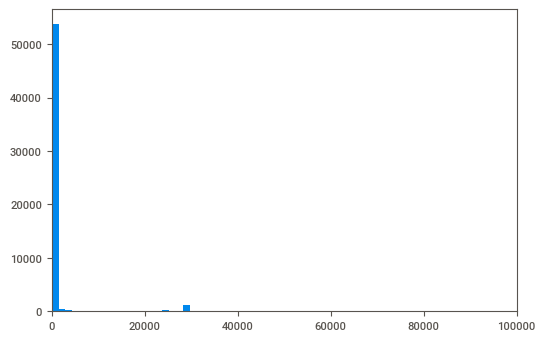

In [52]:
plt.hist(df['duration_secs'],bins=100)
plt.xlim([0,100000])
plt.show()

In [58]:
df['day'] = pd.to_datetime( df['TIMESTAMP_FROM'].apply(lambda x: pd.Timestamp(x)) ).dt.day
df['month'] = pd.to_datetime( df['TIMESTAMP_FROM'].apply(lambda x: pd.Timestamp(x)) ).dt.month
df['year'] = pd.to_datetime( df['TIMESTAMP_FROM'].apply(lambda x: pd.Timestamp(x)) ).dt.year

In [64]:
df.groupby(['year','month','day']).CENTRO.count().quantile([0,0.5,1])

0.0      1.0
0.5      4.0
1.0    370.0
Name: CENTRO, dtype: float64

In [66]:
df.groupby(['year','month']).CENTRO.count()

year  month
2020  3         859
      4         690
      5        4790
      6        4196
      7        4783
      8        3399
      9        3326
      10       2899
      11       2900
      12       3183
2021  1        2106
      2        1634
      3        1191
      4        1520
      5        1709
      6        1907
      7        1640
      8        1756
      9        1816
      10       1666
      11       1123
      12       2697
2022  1        1622
      2        1334
      3        1432
Name: CENTRO, dtype: int64

In [12]:
df[['TIMESTAMP_TO']] - df[['TIMESTAMP_FROM']]

TIMESTAMP_FROM TIMESTAMP_TO
0                NaN          NaN
1                NaN          NaN
2                NaN          NaN
3                NaN          NaN
4                NaN          NaN
...              ...          ...
56173            NaN          NaN
56174            NaN          NaN
56175            NaN          NaN
56176            NaN          NaN
56177            NaN          NaN

[56178 rows x 2 columns]

# 2. Sweetviz 2.1.3

In [7]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.2 MB/s 


In [9]:
import sweetviz as sv

report = sv.analyze(df[df.columns[1:3]])
report.show_html("EDA_report.html") # specify a name for the report

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
